<a href="https://colab.research.google.com/github/wildhugecoconut/Classification-model/blob/main/Jaume_SUP_ML_3_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUP ML 3 - PREDICT

# Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Carga modelo

* Cargar el modelo
* Obtener la lista de model features

In [ ]:
import pickle

In [ ]:
model = pickle.load(open('/content/drive/MyDrive/DSC 0523– Entregable 2 - Borrero, Dottori, He/Modelo/EJERCICIO-ML-Sup/data/traintest.pkl', 'rb'))

# Carga PREDICT dataset

In [ ]:
X_pred = pd.read_csv('/content/drive/MyDrive/DSC 0523– Entregable 2 - Borrero, Dottori, He/Modelo/EJERCICIO-ML-Sup/data/telecom_churn_PREDICT.csv')
X_pred.head()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,30.8350,136.75,29.9900,0.2475,1.25,0.500,0.5,0.000,0.0975,48.25,1.1550,2.000000,0.000000,10.333333,0.0,13.333333,0.0,66.000000,0.000000,3.333333,0.0,40.666667,0.000000,1.333333,1.333333,0.896667,0.666667,0.333333,71.746667,0.000000,5.406667,1.333333,0.713333,0.333333,0.473333,30.000000,0.0,54.500000,0.0,13.666667,0.000000,22.653333,0.000000,12.333333,66.000000,40.666667,0.0,0.000000,7,1,1,U,AA,N,393,958.0,248.46,182.94,958.0,393,30.49,159.67,65.50,121,52,30,160.0,66.0,31.0,C,ATLANTIC SOUTH AREA,Y,N,149.98999,1.0,1.0,WCMB,0.0,0.0,R,NaN,M,M,1.0,M,3.0,NaN,C,NaN,1.0,U,U,U,U,U,U,Y,216.0,1090001
1,35.8475,352.75,24.2700,0.4950,23.25,9.285,8.7,0.585,1.8000,-352.75,-35.8475,9.000000,0.000000,0.000000,0.0,10.000000,0.0,82.666667,1.000000,31.000000,0.0,65.333333,1.000000,3.666667,9.000000,5.890000,18.333333,1.333333,98.543333,1.023333,83.666667,15.666667,12.683333,1.333333,14.286667,38.000000,0.0,106.926667,0.0,43.666667,1.000000,75.283333,1.023333,9.000000,83.666667,66.333333,0.0,1.333333,7,1,1,U,EA,Y,1641,4011.0,391.87,305.59,3998.0,1634,50.93,666.33,272.33,470,181,48,666.0,272.0,51.0,C,NORTHWEST/ROCKY MOUNTAIN AREA,T,N,99.98999,2.0,1.0,WCMB,0.0,0.0,NaN,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N,U,U,U,U,U,N,101.0,1090002
2,30.3275,241.50,39.9900,0.0000,0.00,0.000,0.0,0.000,0.0000,-86.50,0.8625,2.000000,0.000000,4.666667,0.0,20.666667,0.0,85.333333,0.000000,26.666667,0.0,59.333333,0.000000,4.333333,6.333333,4.466667,17.000000,1.666667,143.530000,0.000000,27.373333,9.666667,3.760000,19.666667,21.736667,48.666667,0.0,76.356667,0.0,36.000000,0.000000,94.543333,0.000000,6.666667,85.333333,59.333333,0.0,0.333333,9,2,2,Y,A,N,780,1889.0,312.91,219.45,1772.0,734,31.35,253.14,104.86,270,107,30,273.0,109.0,31.0,T,CENTRAL/SOUTH TEXAS AREA,N,N,129.98999,1.0,1.0,WCMB,1.0,0.0,O,13.0,S,M,3.0,M,6.0,1.0,C,A,0.0,N,U,U,U,U,U,Y,262.0,1090003
3,154.6925,2297.00,149.9900,4.7025,0.00,0.000,0.0,0.000,0.0000,119.00,0.2475,20.333333,0.000000,5.000000,0.0,329.333333,0.0,1067.000000,0.000000,628.000000,0.0,723.000000,0.000000,0.333333,0.666667,0.376667,408.000000,0.000000,769.136667,0.000000,679.020000,271.000000,167.090000,68.666667,150.656667,723.000000,0.0,961.736667,0.0,346.000000,0.000000,486.420000,0.000000,25.333333,1067.000000,723.000000,0.0,8.333333,11,1,1,U,AA,N,9018,18478.0,2217.05,2131.17,18478.0,9018,213.12,1847.80,901.80,2257,1045,155,2452.0,1171.0,278.0,S,ATLANTIC SOUTH AREA,N,R,79.98999,2.0,1.0,WCMB,0.0,0.0,O,3.0,S,U,3.0,M,6.0,1.0,NaN,A,0.0,S,U,U,U,U,U,Y,127.0,1090004
4,156.0050,542.25,48.9475,0.7425,70.75,28.295,28.1,0.195,0.0000,195.75,40.0150,5.666667,0.333333,0.666667,0.0,46.333333,0.0,167.666667,0.666667,11.333333,0.0,115.000000,0.333333,21.666667,48.000000,31.346667,10.000000,0.333333,343.066667,0.010000,11.243333,13.000000,14.563333,1.333333,2.100000,91.000000,0.0,205.216667,0.0,31.000000,0.333333,149.096667,0.010000,6.666667,168.333333,115.333333,0.0,0.666667,9,1,1,U,CA,Y,791,2601.0,879.51,608.66,2601.0,791,86.95,371.57,113.00,477,130,143,349.0,103.0,91.0,U,LOS ANGELES AREA,Y,N,149.98999,2.0,1.0,WCMB,0.0,0.0,O,1.0,NaN,S,1.0,M,6.0,1.0,C,NaN,0.0,N,U,U,U,U,U,Y,37.0,1090005


In [ ]:
# Check features matched features model
features_predict = list(X_pred.columns)
model_features = list(model.feature_names_in_)

In [ ]:
model.feature_names_in_

array(['rev', 'totmrc', 'ovrmou', 'vceovr', 'datovr', 'roam',
       'change_mou', 'change_rev', 'drop_vce', 'drop_dat', 'blck_vce',
       'blck_dat', 'unan_vce', 'unan_dat', 'recv_sms', 'comp_dat',
       'custcare', 'cc_mou', 'inonemin', 'threeway', 'mou_cvce',
       'mou_rvce', 'owylis_vce', 'mouowylisv', 'iwylis_vce', 'mouiwylisv',
       'peak_vce', 'peak_dat', 'mou_peav', 'mou_pead', 'opk_vce',
       'opk_dat', 'mou_opkv', 'mou_opkd', 'drop_blk', 'complete',
       'callfwdv', 'callwait', 'months', 'uniqsubs', 'actvsubs', 'adjrev',
       'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou',
       'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'hnd_price',
       'phones', 'models', 'lor', 'adults', 'income', 'numbcars',
       'eqpdays', 'truck_bool', 'rv_bool', 'forgntvl_bool', 'new_cell_N',
       'new_cell_U', 'new_cell_Y', 'crclscod_A', 'crclscod_AA',
       'crclscod_B', 'crclscod_BA', 'crclscod_C', 'crclscod_CA',
       'crclscod_DA', 'crclscod_EA', 'crc

In [ ]:
features_model =  list(model.feature_names_in_)
print('Estas son las variables que tenemos que conseguir en el preprocessing para que el modelo funcione:\n', features_model)

Estas son las variables que tenemos que conseguir en el preprocessing para que el modelo funcione:
 ['rev', 'totmrc', 'ovrmou', 'vceovr', 'datovr', 'roam', 'change_mou', 'change_rev', 'drop_vce', 'drop_dat', 'blck_vce', 'blck_dat', 'unan_vce', 'unan_dat', 'recv_sms', 'comp_dat', 'custcare', 'cc_mou', 'inonemin', 'threeway', 'mou_cvce', 'mou_rvce', 'owylis_vce', 'mouowylisv', 'iwylis_vce', 'mouiwylisv', 'peak_vce', 'peak_dat', 'mou_peav', 'mou_pead', 'opk_vce', 'opk_dat', 'mou_opkv', 'mou_opkd', 'drop_blk', 'complete', 'callfwdv', 'callwait', 'months', 'uniqsubs', 'actvsubs', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'hnd_price', 'phones', 'models', 'lor', 'adults', 'income', 'numbcars', 'eqpdays', 'truck_bool', 'rv_bool', 'forgntvl_bool', 'new_cell_N', 'new_cell_U', 'new_cell_Y', 'crclscod_A', 'crclscod_AA', 'crclscod_B', 'crclscod_BA', 'crclscod_C', 'crclscod_CA', 'crclscod_DA', 'crclscod_EA', 'crclsco

In [ ]:
features_predict == model_features

False

# ML Preprocessing

Se deben realizar las mismas transformaciones que se aplicaron en el preprocessing del train:
  * Eliminar mismas variables
  * Imputar mismos valores a nulos
  * Aplicar mismo encoding de categoricos
  * ...todo lo necesario para replicar las variables con las que el modelo se entrenó

NO SE DEBEN repetir:
  * Analisis visual de los datos
  * Analisis de correlaciones
  * Analisis de varianza
  * Calculo de metricas que varien con la distribución

In [ ]:
X_pred.set_index('Customer_ID', inplace=True)

In [ ]:
print('Se define {Customer_ID} como indice')

Se define {Customer_ID} como indice


In [ ]:
X_pred.head()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1090001,30.8350,136.75,29.9900,0.2475,1.25,0.500,0.5,0.000,0.0975,48.25,1.1550,2.000000,0.000000,10.333333,0.0,13.333333,0.0,66.000000,0.000000,3.333333,0.0,40.666667,0.000000,1.333333,1.333333,0.896667,0.666667,0.333333,71.746667,0.000000,5.406667,1.333333,0.713333,0.333333,0.473333,30.000000,0.0,54.500000,0.0,13.666667,0.000000,22.653333,0.000000,12.333333,66.000000,40.666667,0.0,0.000000,7,1,1,U,AA,N,393,958.0,248.46,182.94,958.0,393,30.49,159.67,65.50,121,52,30,160.0,66.0,31.0,C,ATLANTIC SOUTH AREA,Y,N,149.98999,1.0,1.0,WCMB,0.0,0.0,R,NaN,M,M,1.0,M,3.0,NaN,C,NaN,1.0,U,U,U,U,U,U,Y,216.0
1090002,35.8475,352.75,24.2700,0.4950,23.25,9.285,8.7,0.585,1.8000,-352.75,-35.8475,9.000000,0.000000,0.000000,0.0,10.000000,0.0,82.666667,1.000000,31.000000,0.0,65.333333,1.000000,3.666667,9.000000,5.890000,18.333333,1.333333,98.543333,1.023333,83.666667,15.666667,12.683333,1.333333,14.286667,38.000000,0.0,106.926667,0.0,43.666667,1.000000,75.283333,1.023333,9.000000,83.666667,66.333333,0.0,1.333333,7,1,1,U,EA,Y,1641,4011.0,391.87,305.59,3998.0,1634,50.93,666.33,272.33,470,181,48,666.0,272.0,51.0,C,NORTHWEST/ROCKY MOUNTAIN AREA,T,N,99.98999,2.0,1.0,WCMB,0.0,0.0,NaN,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N,U,U,U,U,U,N,101.0
1090003,30.3275,241.50,39.9900,0.0000,0.00,0.000,0.0,0.000,0.0000,-86.50,0.8625,2.000000,0.000000,4.666667,0.0,20.666667,0.0,85.333333,0.000000,26.666667,0.0,59.333333,0.000000,4.333333,6.333333,4.466667,17.000000,1.666667,143.530000,0.000000,27.373333,9.666667,3.760000,19.666667,21.736667,48.666667,0.0,76.356667,0.0,36.000000,0.000000,94.543333,0.000000,6.666667,85.333333,59.333333,0.0,0.333333,9,2,2,Y,A,N,780,1889.0,312.91,219.45,1772.0,734,31.35,253.14,104.86,270,107,30,273.0,109.0,31.0,T,CENTRAL/SOUTH TEXAS AREA,N,N,129.98999,1.0,1.0,WCMB,1.0,0.0,O,13.0,S,M,3.0,M,6.0,1.0,C,A,0.0,N,U,U,U,U,U,Y,262.0
1090004,154.6925,2297.00,149.9900,4.7025,0.00,0.000,0.0,0.000,0.0000,119.00,0.2475,20.333333,0.000000,5.000000,0.0,329.333333,0.0,1067.000000,0.000000,628.000000,0.0,723.000000,0.000000,0.333333,0.666667,0.376667,408.000000,0.000000,769.136667,0.000000,679.020000,271.000000,167.090000,68.666667,150.656667,723.000000,0.0,961.736667,0.0,346.000000,0.000000,486.420000,0.000000,25.333333,1067.000000,723.000000,0.0,8.333333,11,1,1,U,AA,N,9018,18478.0,2217.05,2131.17,18478.0,9018,213.12,1847.80,901.80,2257,1045,155,2452.0,1171.0,278.0,S,ATLANTIC SOUTH AREA,N,R,79.98999,2.0,1.0,WCMB,0.0,0.0,O,3.0,S,U,3.0,M,6.0,1.0,NaN,A,0.0,S,U,U,U,U,U,Y,127.0
1090005,156.0050,542.25,48.9475,0.7425,70.75,28.295,28.1,0.195,0.0000,195.75,40.0150,5.666667,0.333333,0.666667,0.0,46.333333,0.0,167.666667,0.666667,11.333333,0.0,115.000000,0.333333,21.666667,48.000000,31.346667,10.000000,0.333333,343.066667,0.010000,11.243333,13.000000,14.563333,1.333333,2.100000,91.000000,0.0,205.216667,0.0,31.000000,0.333333,149.096667,0.010000,6.666667,168.333333,115.333333,0.0,0.666667,9,1,1,U,CA,Y,791,2601.0,879.51,608.66,2601.0,791,86.95,371.57,113.00,477,130,143,349.0,103.0,91.0,U,LOS ANGELES AREA,Y,N,149.98999,2.0,1.0,WCMB,0.0,0.0,O,1.0,NaN,S,1.0,M,6.0,1.0,C,N

In [ ]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1090001 to 1100000
Data columns (total 98 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               9777 non-null   float64
 1   mou               9777 non-null   float64
 2   totmrc            9777 non-null   float64
 3   da                9777 non-null   float64
 4   ovrmou            9777 non-null   float64
 5   ovrrev            9777 non-null   float64
 6   vceovr            9777 non-null   float64
 7   datovr            9777 non-null   float64
 8   roam              9777 non-null   float64
 9   change_mou        9704 non-null   float64
 10  change_rev        9704 non-null   float64
 11  drop_vce          10000 non-null  float64
 12  drop_dat          10000 non-null  float64
 13  blck_vce          10000 non-null  float64
 14  blck_dat          10000 non-null  float64
 15  unan_vce          10000 non-null  float64
 16  unan_dat          10000 non-null

In [ ]:
X_pred.shape

(10000, 98)

In [ ]:
X_pred.isnull().values.any()

True

In [ ]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1090001 to 1100000
Data columns (total 98 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               9777 non-null   float64
 1   mou               9777 non-null   float64
 2   totmrc            9777 non-null   float64
 3   da                9777 non-null   float64
 4   ovrmou            9777 non-null   float64
 5   ovrrev            9777 non-null   float64
 6   vceovr            9777 non-null   float64
 7   datovr            9777 non-null   float64
 8   roam              9777 non-null   float64
 9   change_mou        9704 non-null   float64
 10  change_rev        9704 non-null   float64
 11  drop_vce          10000 non-null  float64
 12  drop_dat          10000 non-null  float64
 13  blck_vce          10000 non-null  float64
 14  blck_dat          10000 non-null  float64
 15  unan_vce          10000 non-null  float64
 16  unan_dat          10000 non-null

In [ ]:
X_pred.isnull().sum()

rev         223
mou         223
totmrc      223
da          223
ovrmou      223
           ... 
kid6_10     281
kid11_15    281
kid16_17    281
creditcd    281
eqpdays       0
Length: 98, dtype: int64

In [ ]:
X_pred['rev'].isnull().sum()

223

In [ ]:
X_pred['rev'].max()

847.8175

In [ ]:
X_pred['rev'].min()

-6.1675

In [ ]:
X_pred['rev'] = np.where(X_pred['rev']<0, X_pred['rev'] == 0, X_pred['rev'])

In [ ]:
X_pred['rev'].min()

0.0

In [ ]:
X_pred['rev'].fillna(-999, inplace = True)

In [ ]:
X_pred['rev'].isnull().sum()

0

In [ ]:
X_pred['mou'].isnull().sum()

223

In [ ]:
X_pred['mou'].max()

7667.75

In [ ]:
X_pred['mou'].min()

0.0

In [ ]:
X_pred['mou'].fillna(-999, inplace = True)

In [ ]:
X_pred['mou'].isnull().sum()

0

In [ ]:
X_pred['totmrc'].max()

399.99

In [ ]:
X_pred['totmrc'].min()

-6.1675

In [ ]:
X_pred['totmrc'] = np.where(X_pred['totmrc']<0, X_pred['totmrc'] == 0, X_pred['totmrc'])

In [ ]:
X_pred['totmrc'].isnull().sum()

223

In [ ]:
X_pred['totmrc'].fillna(-999, inplace = True)

In [ ]:
X_pred['totmrc'].isnull().sum()

0

In [ ]:
X_pred['da'].isnull().sum()

223

In [ ]:
X_pred['da'].max()

38.8575

In [ ]:
X_pred['da'].min()

0.0

In [ ]:
X_pred['da'].fillna(-999, inplace = True)

In [ ]:
X_pred['da'].isnull().sum()

0

In [ ]:
X_pred['ovrmou'].isnull().sum()

223

In [ ]:
X_pred['ovrmou'].max()

3472.25

In [ ]:
X_pred['ovrmou'].min()

0.0

In [ ]:
X_pred['ovrmou'].fillna(-999, inplace = True)

In [ ]:
X_pred['ovrmou'].isnull().sum()

0

In [ ]:
X_pred['ovrrev'].max()

595.68

In [ ]:
X_pred['ovrrev'].min()

0.0

In [ ]:
X_pred['ovrrev'].isnull().sum()

223

In [ ]:
X_pred['ovrrev'].fillna(-999, inplace = True)

In [ ]:
X_pred['ovrrev'].isnull().sum()

0

In [ ]:
X_pred['vceovr'].isnull().sum()

223

In [ ]:
X_pred['vceovr'].max()

594.9

In [ ]:
X_pred['vceovr'].min()

0.0

In [ ]:
X_pred['vceovr'].fillna(-999, inplace = True)

In [ ]:
X_pred['vceovr'].isnull().sum()

0

In [ ]:
X_pred['datovr'].max()

242.8725

In [ ]:
X_pred['datovr'].min()

0.0

In [ ]:
X_pred['datovr'].isnull().sum()

223

In [ ]:
X_pred['datovr'].fillna(-999, inplace = True)

In [ ]:
X_pred['datovr'].isnull().sum()

0

In [ ]:
X_pred['roam'].max()

159.85

In [ ]:
X_pred['roam'].min()

0.0

In [ ]:
X_pred['roam'].isnull().sum()

223

In [ ]:
X_pred['roam'].fillna(-999, inplace = True)

In [ ]:
X_pred['roam'].isnull().sum()

0

In [ ]:
X_pred['change_mou'].max()

5192.25

In [ ]:
X_pred['change_mou'].min()

-3041.25

In [ ]:
X_pred['change_mou'].isnull().sum()

296

In [ ]:
X_pred['change_mou'].fillna(-999, inplace = True)

In [ ]:
X_pred['change_mou'].isnull().sum()

0

In [ ]:
X_pred['change_rev'].isnull().sum()

296

In [ ]:
X_pred['change_rev'].max()

2483.4825

In [ ]:
X_pred['change_rev'].min()

-458.9725

In [ ]:
X_pred['change_rev'].fillna(-999, inplace = True)

In [ ]:
X_pred['change_rev'].isnull().sum()

0

In [ ]:
X_pred['drop_vce'].min()

0.0

In [ ]:
X_pred['drop_vce'].max()

208.6666667

In [ ]:
X_pred['drop_vce'].isnull().sum()

0

In [ ]:
X_pred['drop_dat'].max()

58.0

In [ ]:
X_pred['drop_dat'].min()

0.0

In [ ]:
X_pred['blck_vce'].min()

0.0

In [ ]:
X_pred['blck_vce'].max()

384.3333333

In [ ]:
X_pred['blck_dat'].max()

413.3333333

In [ ]:
X_pred['blck_dat'].min()

0.0

In [ ]:
X_pred['unan_vce'].max()

676.6666667

In [ ]:
X_pred['unan_vce'].min()

0.0

In [ ]:
X_pred['unan_dat'].max()

20.66666667

In [ ]:
X_pred['unan_dat'].min()

0.0

In [ ]:
X_pred['plcd_vce'].max()

2136.0

In [ ]:
X_pred['plcd_vce'].min()

0.0

In [ ]:
X_pred['plcd_dat'].max()

547.3333333

In [ ]:
X_pred['plcd_dat'].min()

0.0

In [ ]:
X_pred['recv_vce'].max()

1589.0

In [ ]:
X_pred['recv_vce'].min()

0.0

In [ ]:
cols_a_revisar = ['recv_sms', 'comp_vce', 'comp_dat',
                  'custcare', 'ccrndmou', 'cc_mou', 'inonemin', 'threeway',
                  'threeway', 'mou_cvce', 'mou_cdat', 'mou_rvce', 'owylis_vce',
                  'mouowylisv']


[[<Axes: title={'center': 'recv_sms'}>]]
[[<Axes: title={'center': 'comp_vce'}>]]
[[<Axes: title={'center': 'comp_dat'}>]]
[[<Axes: title={'center': 'custcare'}>]]
[[<Axes: title={'center': 'ccrndmou'}>]]
[[<Axes: title={'center': 'cc_mou'}>]]
[[<Axes: title={'center': 'inonemin'}>]]
[[<Axes: title={'center': 'threeway'}>]]
[[<Axes: title={'center': 'threeway'}>]]
[[<Axes: title={'center': 'mou_cvce'}>]]
[[<Axes: title={'center': 'mou_cdat'}>]]
[[<Axes: title={'center': 'mou_rvce'}>]]
[[<Axes: title={'center': 'owylis_vce'}>]]
[[<Axes: title={'center': 'mouowylisv'}>]]


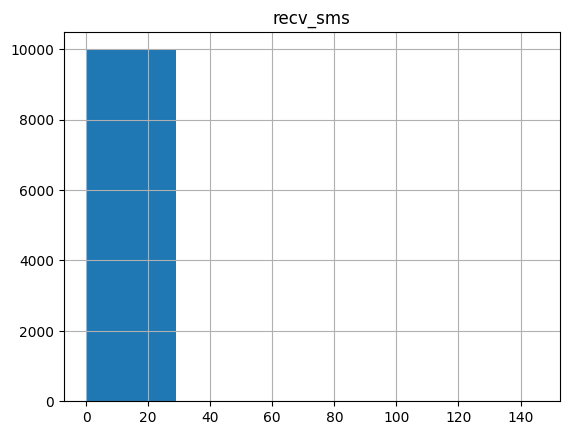

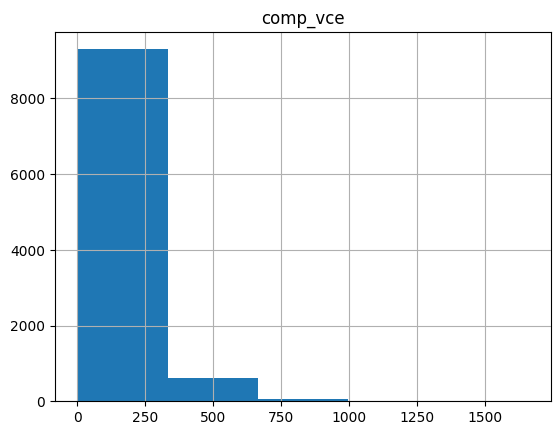

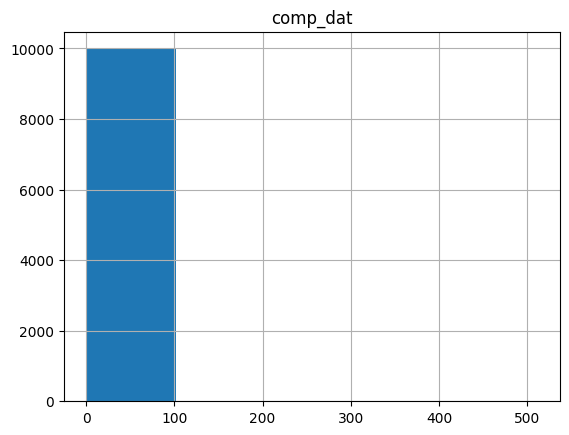

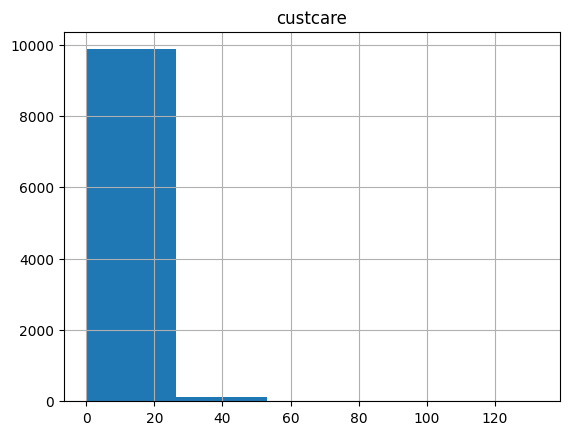

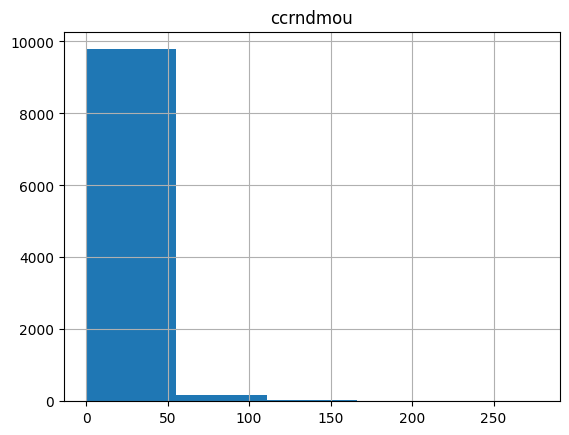

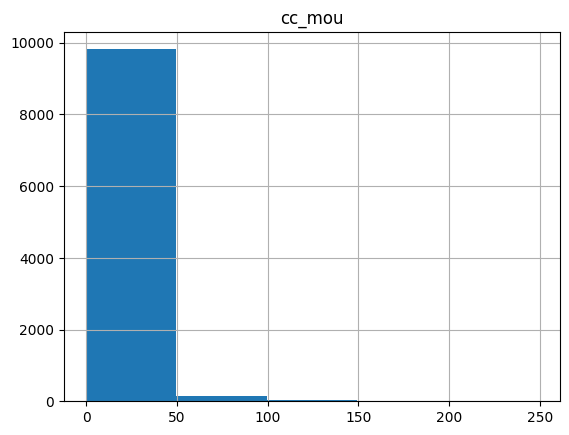

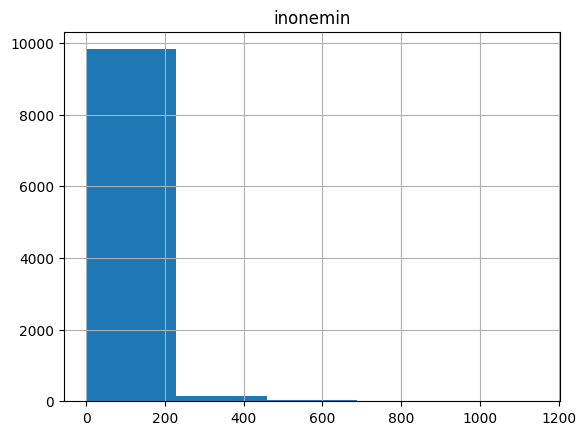

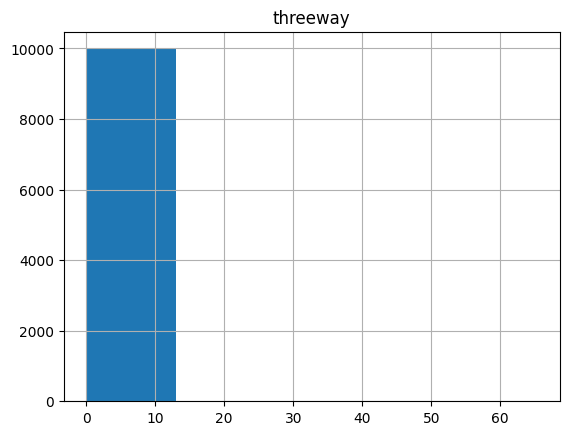

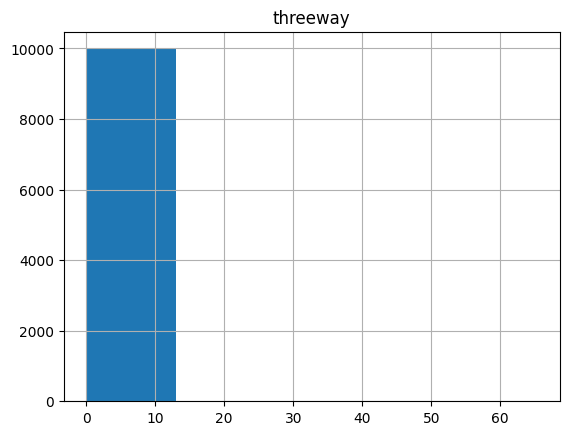

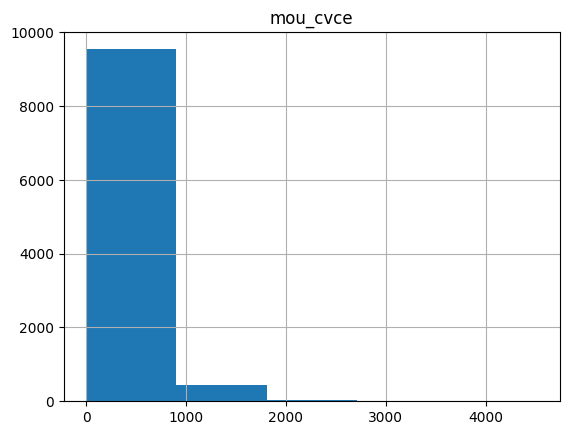

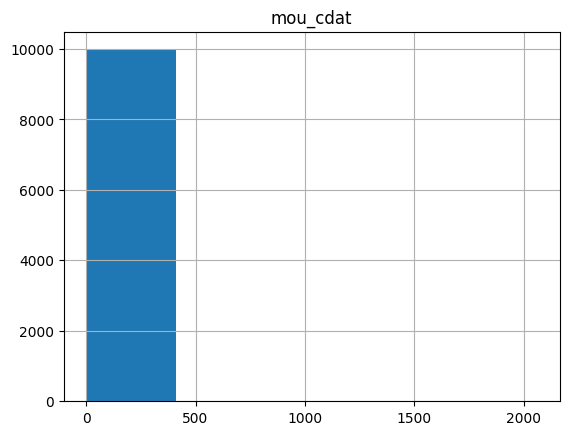

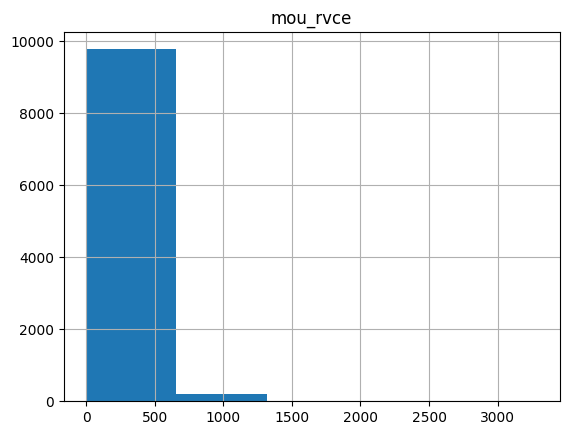

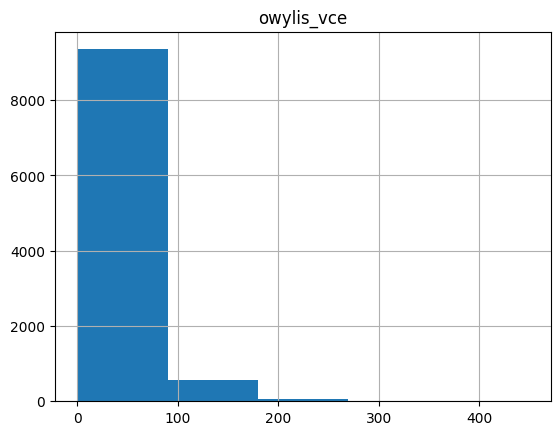

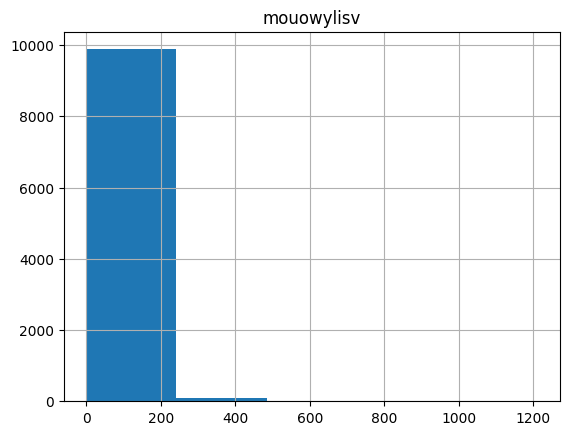

In [ ]:
for i in cols_a_revisar:
  print(X_pred.hist(i, bins = 5))

In [ ]:
X_pred['new_cell'].value_counts()

U    8102
Y    1187
N     711
Name: new_cell, dtype: int64

In [ ]:
X_pred.isnull().sum()

rev           0
mou           0
totmrc        0
da            0
ovrmou        0
           ... 
kid6_10     281
kid11_15    281
kid16_17    281
creditcd    281
eqpdays       0
Length: 98, dtype: int64

array([[<Axes: title={'center': 'avg6mou'}>]], dtype=object)

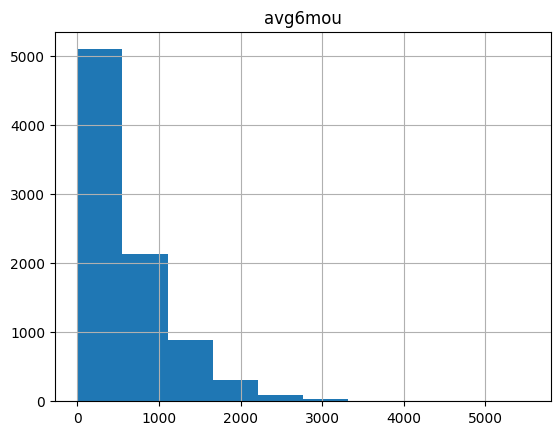

In [ ]:
X_pred.hist('avg6mou')

In [ ]:
X_pred['avg6mou'].isnull().sum()

1432

In [ ]:
X_pred['avg6mou'].fillna(-999, inplace=True)

In [ ]:
X_pred['avg6mou'].isnull().sum()

0

array([[<Axes: title={'center': 'avg6qty'}>]], dtype=object)

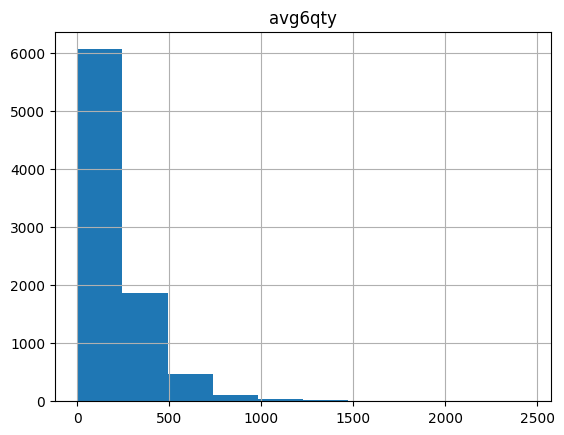

In [ ]:
X_pred.hist('avg6qty')

In [ ]:
X_pred['avg6qty'].isnull().sum()

1432

In [ ]:
X_pred['avg6qty'].fillna(-999, inplace=True)

In [ ]:
X_pred['avg6rev'].isnull().sum()

1432

array([[<Axes: title={'center': 'avg6rev'}>]], dtype=object)

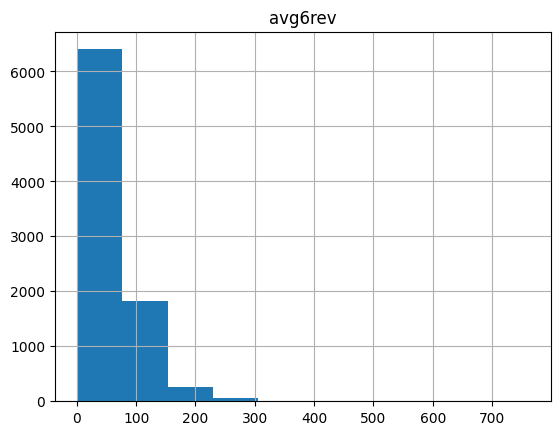

In [ ]:
X_pred.hist('avg6rev')

In [ ]:
X_pred['avg6rev'].isnull().sum()

1432

In [ ]:
X_pred['avg6rev'].fillna(-999, inplace=True)

In [ ]:
X_pred['avg6rev'].isnull().sum()

0

In [ ]:
X_pred['prizm_social_one'].value_counts()

S    2894
U    2678
C    1774
T    1284
R     519
Name: prizm_social_one, dtype: int64

In [ ]:
X_pred['prizm_social_one'].isnull().sum()

851

In [ ]:
X_pred['prizm_social_one'].fillna('S', inplace=True)

In [ ]:
X_pred['prizm_social_one'].value_counts()

S    3745
U    2678
C    1774
T    1284
R     519
Name: prizm_social_one, dtype: int64

In [ ]:
X_pred['prizm_social_one'].isnull().sum()

0

In [ ]:
X_pred['area'].isnull().sum()

0

In [ ]:
X_pred['area'].value_counts()

LOS ANGELES AREA                 2080
SOUTHWEST AREA                   1181
NEW YORK CITY AREA                805
DC/MARYLAND/VIRGINIA AREA         643
ATLANTIC SOUTH AREA               606
MIDWEST AREA                      455
HOUSTON AREA                      454
CALIFORNIA NORTH AREA             437
CHICAGO AREA                      379
GREAT LAKES AREA                  373
NEW ENGLAND AREA                  362
NORTH FLORIDA AREA                354
CENTRAL/SOUTH TEXAS AREA          337
DALLAS AREA                       320
OHIO AREA                         320
NORTHWEST/ROCKY MOUNTAIN AREA     315
SOUTH FLORIDA AREA                213
TENNESSEE AREA                    183
PHILADELPHIA AREA                 183
Name: area, dtype: int64

In [ ]:
X_pred['area'].fillna('NEW YORK CITY AREA', inplace=True)

In [ ]:
X_pred['area'].value_counts()

LOS ANGELES AREA                 2080
SOUTHWEST AREA                   1181
NEW YORK CITY AREA                805
DC/MARYLAND/VIRGINIA AREA         643
ATLANTIC SOUTH AREA               606
MIDWEST AREA                      455
HOUSTON AREA                      454
CALIFORNIA NORTH AREA             437
CHICAGO AREA                      379
GREAT LAKES AREA                  373
NEW ENGLAND AREA                  362
NORTH FLORIDA AREA                354
CENTRAL/SOUTH TEXAS AREA          337
DALLAS AREA                       320
OHIO AREA                         320
NORTHWEST/ROCKY MOUNTAIN AREA     315
SOUTH FLORIDA AREA                213
TENNESSEE AREA                    183
PHILADELPHIA AREA                 183
Name: area, dtype: int64

In [ ]:
X_pred['area'].isnull().sum()

0

In [ ]:
city_areas = {
    'NEW YORK CITY AREA': 'Northeast',
    'DC/MARYLAND/VIRGINIA AREA': 'Mid-Atlantic',
    'MIDWEST AREA': 'Midwest',
    'ATLANTIC SOUTH AREA': 'Southeast',
    'CALIFORNIA NORTH AREA': 'West',
    'DALLAS AREA': 'Southwest',
    'NEW ENGLAND AREA': 'Northeast',
    'SOUTHWEST AREA': 'Southwest',
    'CHICAGO AREA': 'Midwest',
    'LOS ANGELES AREA': 'West',
    'GREAT LAKES AREA': 'Midwest',
    'OHIO AREA': 'Midwest',
    'NORTHWEST/ROCKY MOUNTAIN AREA': 'West',
    'NORTH FLORIDA AREA': 'Southeast',
    'CENTRAL/SOUTH TEXAS AREA': 'Southwest',
    'HOUSTON AREA': 'Southwest',
    'SOUTH FLORIDA AREA': 'Southeast',
    'TENNESSEE AREA': 'Southeast',
    'PHILADELPHIA AREA': 'Mid-Atlantic'
}

In [ ]:
X_pred['area'] = X_pred['area'].map(city_areas)

In [ ]:
X_pred['area'].value_counts()

West            2832
Southwest       2292
Midwest         1527
Southeast       1356
Northeast       1167
Mid-Atlantic     826
Name: area, dtype: int64

In [ ]:
X_pred['dualband'].value_counts()

Y    6288
N    2778
T     903
U      31
Name: dualband, dtype: int64

In [ ]:
X_pred['dualband'].isnull().sum()

0

In [ ]:
X_pred['dualband'].fillna('Y', inplace=True)

In [ ]:
X_pred['dualband'].isnull().sum()

0

In [ ]:
X_pred['refurb_new'].value_counts()

N    8969
R    1031
Name: refurb_new, dtype: int64

In [ ]:
X_pred['refurb_new'].isnull().sum()

0

In [ ]:
X_pred['refurb_new'].fillna('N', inplace=True)


In [ ]:
X_pred['refurb_new'].isnull().sum()

0

In [ ]:
X_pred['hnd_price'].isnull().sum()

143

array([[<Axes: title={'center': 'hnd_price'}>]], dtype=object)

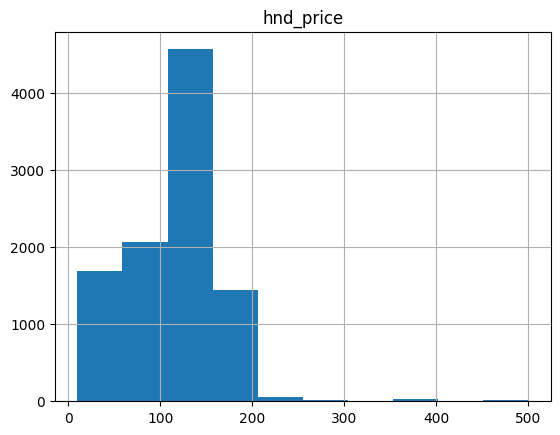

In [ ]:
X_pred.hist('hnd_price')

In [ ]:
X_pred['hnd_price'].fillna(-999, inplace=True)

In [ ]:
X_pred['hnd_price'].isnull().sum()

0

In [ ]:
X_pred['phones'].isnull().sum()

0

In [ ]:
X_pred['phones'].value_counts()

1.0     6456
2.0     2131
3.0      769
4.0      322
5.0      135
6.0       63
7.0       46
8.0       34
9.0       16
11.0      10
10.0       7
12.0       6
16.0       2
28.0       1
13.0       1
14.0       1
Name: phones, dtype: int64

In [ ]:
X_pred['phones'].fillna(1.0, inplace=True)

In [ ]:
X_pred['models'].describe()

count    10000.000000
mean         1.452600
std          0.870993
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: models, dtype: float64

array([[<Axes: title={'center': 'models'}>]], dtype=object)

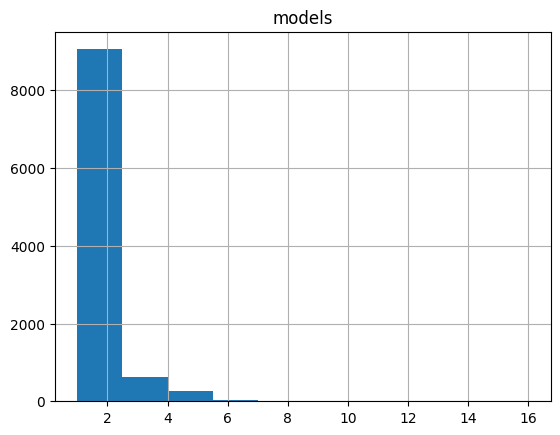

In [ ]:
X_pred.hist('models')

In [ ]:
X_pred['models'].isnull().sum()

0

In [ ]:
X_pred['models'].fillna(1.0, inplace=True)

In [ ]:
X_pred['models'].isnull().sum()

0

In [ ]:
X_pred['hnd_webcap'].value_counts()

WCMB    8337
WC       960
UNKW      33
Name: hnd_webcap, dtype: int64

In [ ]:
X_pred['hnd_webcap'].isnull().sum()

670

In [ ]:
X_pred['hnd_webcap'].fillna('WCMB', inplace=True)

In [ ]:
X_pred['hnd_webcap'].value_counts()

WCMB    9007
WC       960
UNKW      33
Name: hnd_webcap, dtype: int64

In [ ]:
X_pred['hnd_webcap'].isnull().sum()

0

In [ ]:
X_pred['truck'].value_counts()

0.0    8625
1.0    1094
Name: truck, dtype: int64

In [ ]:
X_pred['truck'].isnull().sum()

281

In [ ]:
X_pred['truck'].fillna(0.0, inplace=True)

In [ ]:
X_pred['truck'].value_counts()

0.0    8906
1.0    1094
Name: truck, dtype: int64

In [ ]:
X_pred['truck'].isnull().sum()

0

In [ ]:
X_pred['rv'].value_counts()

0.0    9296
1.0     423
Name: rv, dtype: int64

In [ ]:
X_pred['rv'].fillna(0.0, inplace=True)

In [ ]:
X_pred['rv'].value_counts()

0.0    9577
1.0     423
Name: rv, dtype: int64

In [ ]:
X_pred['ownrent'].value_counts()

O    5555
R     230
Name: ownrent, dtype: int64

In [ ]:
X_pred['ownrent'].isnull().sum() *100/len(X_pred['ownrent'])

42.15

In [ ]:
X_pred['ownrent'].value_counts(normalize=True)

O    0.960242
R    0.039758
Name: ownrent, dtype: float64

In [ ]:
X_pred['ownrent'].isnull().sum()

4215

In [ ]:
X_pred['ownrent'].fillna('O', inplace=True)

In [ ]:
X_pred['ownrent'].isnull().sum()

0

array([[<Axes: title={'center': 'lor'}>]], dtype=object)

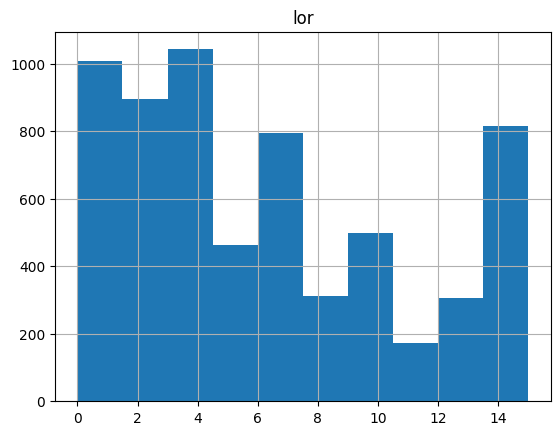

In [ ]:
X_pred.hist('lor')

In [ ]:
X_pred['lor'].isnull().sum() *100/len(X_pred['lor'])

36.88

In [ ]:
X_pred['lor'].fillna(-999, inplace=True)

In [ ]:
X_pred['dwlltype'].value_counts()

S    4238
M    1831
Name: dwlltype, dtype: int64

In [ ]:
X_pred['dwlltype'].isnull().sum()

3931

In [ ]:
X_pred['dwlltype'].isnull().sum() * 100/len(X_pred['dwlltype'])

39.31

In [ ]:
X_pred['dwlltype'].value_counts(normalize=True)

S    0.698303
M    0.301697
Name: dwlltype, dtype: float64

In [ ]:
X_pred_dwlltype_counts = X_pred["dwlltype"].value_counts()

# Calcular la proporción de cada color en relación con el total de colores no nulos
total_non_null = X_pred_dwlltype_counts.sum()
proportions = X_pred_dwlltype_counts / total_non_null

# Calcular el número de nulos que se asignará a cada color
total_nulls = X_pred["dwlltype"].isnull().sum()

# Manejar el caso cuando no hay valores nulos
if total_nulls == 0:
    print("No hay valores nulos en la columna 'color'.")
else:
    nulls_per_dwlltype = np.round(proportions * total_nulls).astype(int)

    # Distribuir los nulos proporcionalmente en los colores existentes
    null_indices = X_pred[X_pred["dwlltype"].isnull()].index
    dwlltype = nulls_per_dwlltype.index.to_list()
    weights = nulls_per_dwlltype.values / nulls_per_dwlltype.sum()
    replacement_dwlltype = np.random.choice(dwlltype, size=len(null_indices), p=weights)
    X_pred.loc[null_indices, "dwlltype"] = replacement_dwlltype

In [ ]:
X_pred['dwlltype'].value_counts()

S    7043
M    2957
Name: dwlltype, dtype: int64

In [ ]:
X_pred['marital'].value_counts()

U    4283
M    2633
S    1676
B     725
A     402
Name: marital, dtype: int64

In [ ]:
X_pred['marital'].isnull().sum()

281

In [ ]:
X_pred['marital'].value_counts()

U    4283
M    2633
S    1676
B     725
A     402
Name: marital, dtype: int64

In [ ]:
X_pred['marital'].fillna('U', inplace=True)

In [ ]:
X_pred['marital'].isnull().sum()

0

In [ ]:
X_pred['adults'].value_counts()

1.0    2258
2.0    2023
3.0    1224
4.0     714
5.0     405
6.0     390
Name: adults, dtype: int64

In [ ]:
X_pred['adults'].isnull().sum()

2986

In [ ]:
# Assuming you have already loaded the DataFrame "df" containing the "adults" column

# Calculate the counts of each category in the "adults" column
X_pred_adults_counts = X_pred["adults"].value_counts()

# Calculate the proportion of each category in relation to the total non-null categories
total_non_null = X_pred_adults_counts.sum()
proportions = X_pred_adults_counts / total_non_null

# Calculate the number of missing values that will be assigned to each category
total_nulls = X_pred["adults"].isnull().sum()

# Handle the case when there are no missing values
if total_nulls == 0:
    print("No hay valores nulos en la columna 'adults'.")
else:
    nulls_per_adults = np.round(proportions * total_nulls).astype(int)

    # Distribute the missing values proportionally among the existing categories
    null_indices = X_pred[X_pred["adults"].isnull()].index
    adults = nulls_per_adults.index.to_list()
    weights = nulls_per_adults.values / nulls_per_adults.sum()
    replacement_adults = np.random.choice(adults, size=len(null_indices), p=weights)
    X_pred.loc[null_indices, "adults"] = replacement_adults

In [ ]:
X_pred['adults'].isnull().sum()

0

In [ ]:
X_pred['adults'].value_counts()

1.0    3209
2.0    2885
3.0    1770
4.0    1011
5.0     579
6.0     546
Name: adults, dtype: int64

In [ ]:
X_pred['infobase'].value_counts()

M    7100
N     224
Name: infobase, dtype: int64

In [ ]:
X_pred['infobase'].isnull().sum()*100/len(X_pred['infobase'])

26.76

In [ ]:
X_pred['infobase'].fillna('M', inplace=True)

In [ ]:
X_pred['infobase'].isnull().sum()

0

In [ ]:
X_pred['income'].isnull().sum()

3240

array([[<Axes: title={'center': 'income'}>]], dtype=object)

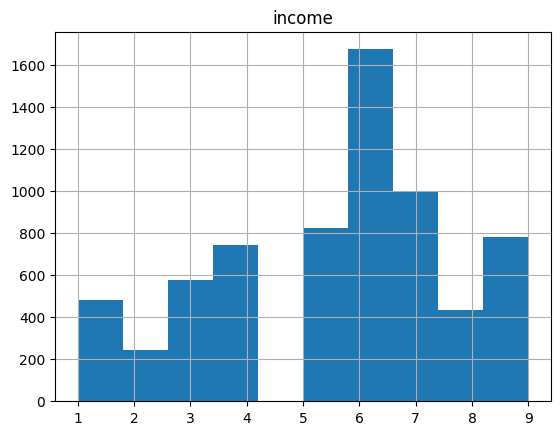

In [ ]:
X_pred.hist('income')

In [ ]:
X_pred['income'].describe()

count    6760.00000
mean        5.52071
std         2.21680
min         1.00000
25%         4.00000
50%         6.00000
75%         7.00000
max         9.00000
Name: income, dtype: float64

In [ ]:
X_pred['income'].fillna(-999, inplace=True)

In [ ]:
X_pred['income'].isnull().sum()

0

In [ ]:
X_pred['numbcars'].value_counts()

1.0    2098
2.0    1885
3.0     219
Name: numbcars, dtype: int64

In [ ]:
X_pred['numbcars'].fillna(-999.00, inplace=True)

In [ ]:
X_pred['numbcars'].isnull().sum()

0

In [ ]:
X_pred['HHstatin'].value_counts()

C    3031
I     967
A     472
B     338
G     208
H      93
Name: HHstatin, dtype: int64

In [ ]:
X_pred['HHstatin'].isnull().sum() * 100/len(X_pred['HHstatin'])

48.91

In [ ]:
# Assuming you have already loaded the DataFrame "df" containing the "HHstatin" column

# Calculate the counts of each category in the "HHstatin" column
X_pred_HHstatin_counts = X_pred["HHstatin"].value_counts()

# Calculate the proportion of each category in relation to the total non-null categories
total_non_null = X_pred_HHstatin_counts.sum()
proportions = X_pred_HHstatin_counts / total_non_null

# Calculate the number of missing values that will be assigned to each category
total_nulls = X_pred["HHstatin"].isnull().sum()

# Handle the case when there are no missing values
if total_nulls == 0:
    print("No hay valores nulos en la columna 'HHstatin'.")
else:
    nulls_per_category = np.round(proportions * total_nulls).astype(int)

    # Distribute the missing values proportionally among the existing categories
    null_indices = X_pred[X_pred["HHstatin"].isnull()].index
    categories = nulls_per_category.index.to_list()
    weights = nulls_per_category.values / nulls_per_category.sum()
    replacement_HHstatin = np.random.choice(categories, size=len(null_indices), p=weights)
    X_pred.loc[null_indices, "HHstatin"] = replacement_HHstatin

In [ ]:
X_pred['HHstatin'].isnull().sum()

0

In [ ]:
X_pred['dwllsize'].value_counts()

A    4087
B     462
J     150
C     140
N      95
O      93
D      69
K      66
L      63
E      53
G      46
F      37
H      37
M      31
I      27
Name: dwllsize, dtype: int64

In [ ]:
X_pred['dwllsize'].isnull().sum()

4544

In [ ]:
X_pred['dwllsize'].isnull().sum() * 100/len(X_pred['dwllsize'])

45.44

In [ ]:
X_pred['dwllsize'].value_counts(normalize=True)

A    0.749084
B    0.084677
J    0.027493
C    0.025660
N    0.017412
O    0.017045
D    0.012647
K    0.012097
L    0.011547
E    0.009714
G    0.008431
F    0.006782
H    0.006782
M    0.005682
I    0.004949
Name: dwllsize, dtype: float64

In [ ]:
X_pred['dwllsize'].fillna('A', inplace=True)

In [ ]:
X_pred['forgntvl'].isnull().sum()

281

In [ ]:
X_pred['forgntvl'].value_counts()

0.0    9269
1.0     450
Name: forgntvl, dtype: int64

In [ ]:
X_pred['forgntvl'].fillna(0.0, inplace=True)

In [ ]:
X_pred['forgntvl'].value_counts()

0.0    9550
1.0     450
Name: forgntvl, dtype: int64

In [ ]:
X_pred['ethnic'].value_counts()

N    2989
H    1652
S    1123
U     968
G     458
Z     445
P     394
O     387
I     302
C     244
J     216
F     187
R      99
B      95
X      82
D      66
M      12
Name: ethnic, dtype: int64

In [ ]:
X_pred['ethnic'].isnull().sum()

281

In [ ]:
X_pred['ethnic'].fillna('N', inplace=True)

In [ ]:
X_pred['ethnic'].isnull().sum()

0

In [ ]:
X_pred['kid0_2'].value_counts()

U    9318
Y     401
Name: kid0_2, dtype: int64

In [ ]:
X_pred['kid0_2'].isnull().sum()

281

In [ ]:
X_pred['kid0_2'].fillna('U', inplace=True)

In [ ]:
X_pred['kid0_2'].isnull().sum()

0

In [ ]:
X_pred['kid3_5'].value_counts()

U    9264
Y     455
Name: kid3_5, dtype: int64

In [ ]:
X_pred['kid3_5'].isnull().sum()

281

In [ ]:
X_pred['kid3_5'].fillna('U', inplace=True)

In [ ]:
X_pred['kid3_5'].isnull().sum()

0

In [ ]:
X_pred['kid6_10'].value_counts()

U    8999
Y     720
Name: kid6_10, dtype: int64

In [ ]:
X_pred['kid6_10'].isnull().sum()

281

In [ ]:
X_pred['kid6_10'].fillna('U', inplace=True)

In [ ]:
X_pred['kid6_10'].isnull().sum()

0

In [ ]:
X_pred['kid11_15'].value_counts()

U    8957
Y     762
Name: kid11_15, dtype: int64

In [ ]:
X_pred['kid11_15'].isnull().sum()

281

In [ ]:
X_pred['kid11_15'].fillna('U', inplace=True)

In [ ]:
X_pred['kid11_15'].isnull().sum()

0

In [ ]:
X_pred['kid16_17'].value_counts()

U    8885
Y     834
Name: kid16_17, dtype: int64

In [ ]:
X_pred['kid16_17'].isnull().sum()

281

In [ ]:
X_pred['kid16_17'].fillna('U', inplace=True)

In [ ]:
X_pred['kid16_17'].isnull().sum()

0

In [ ]:
X_pred['creditcd'].value_counts()

Y    5518
N    4201
Name: creditcd, dtype: int64

In [ ]:
X_pred['creditcd'].isnull().sum()

281

In [ ]:
X_pred['creditcd'].fillna('Y', inplace=True)

array([[<Axes: title={'center': 'eqpdays'}>]], dtype=object)

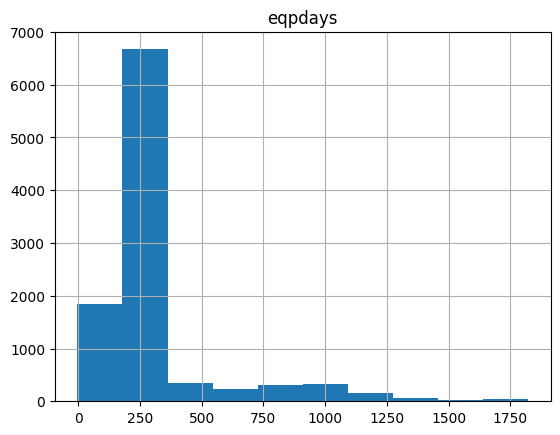

In [ ]:
X_pred.hist('eqpdays')

In [ ]:
X_pred['eqpdays'].isnull().sum()

0

In [ ]:
X_pred['eqpdays'].fillna(-999, inplace=True)

In [ ]:
X_pred['eqpdays'].isnull().sum()

0

In [ ]:
len(X_pred.index.unique())==len(X_pred.index)

True

In [ ]:
X_pred.shape

(10000, 98)

In [ ]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1090001 to 1100000
Data columns (total 98 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               10000 non-null  float64
 1   mou               10000 non-null  float64
 2   totmrc            10000 non-null  float64
 3   da                10000 non-null  float64
 4   ovrmou            10000 non-null  float64
 5   ovrrev            10000 non-null  float64
 6   vceovr            10000 non-null  float64
 7   datovr            10000 non-null  float64
 8   roam              10000 non-null  float64
 9   change_mou        10000 non-null  float64
 10  change_rev        10000 non-null  float64
 11  drop_vce          10000 non-null  float64
 12  drop_dat          10000 non-null  float64
 13  blck_vce          10000 non-null  float64
 14  blck_dat          10000 non-null  float64
 15  unan_vce          10000 non-null  float64
 16  unan_dat          10000 non-null

In [ ]:
X_pred.shape

(10000, 98)

In [ ]:
if X_pred.isnull().sum().any() == False:

  print('El dataset no contiene nulos a imputar')

El dataset no contiene nulos a imputar


In [ ]:
del(X_pred["infobase"])

In [ ]:
X_pred.head()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1090001,30.8350,136.75,29.9900,0.2475,1.25,0.500,0.5,0.000,0.0975,48.25,1.1550,2.000000,0.000000,10.333333,0.0,13.333333,0.0,66.000000,0.000000,3.333333,0.0,40.666667,0.000000,1.333333,1.333333,0.896667,0.666667,0.333333,71.746667,0.000000,5.406667,1.333333,0.713333,0.333333,0.473333,30.000000,0.0,54.500000,0.0,13.666667,0.000000,22.653333,0.000000,12.333333,66.000000,40.666667,0.0,0.000000,7,1,1,U,AA,N,393,958.0,248.46,182.94,958.0,393,30.49,159.67,65.50,121,52,30,160.0,66.0,31.0,C,Southeast,Y,N,149.98999,1.0,1.0,WCMB,0.0,0.0,R,-999.0,M,M,1.0,3.0,-999.0,C,A,1.0,U,U,U,U,U,U,Y,216.0
1090002,35.8475,352.75,24.2700,0.4950,23.25,9.285,8.7,0.585,1.8000,-352.75,-35.8475,9.000000,0.000000,0.000000,0.0,10.000000,0.0,82.666667,1.000000,31.000000,0.0,65.333333,1.000000,3.666667,9.000000,5.890000,18.333333,1.333333,98.543333,1.023333,83.666667,15.666667,12.683333,1.333333,14.286667,38.000000,0.0,106.926667,0.0,43.666667,1.000000,75.283333,1.023333,9.000000,83.666667,66.333333,0.0,1.333333,7,1,1,U,EA,Y,1641,4011.0,391.87,305.59,3998.0,1634,50.93,666.33,272.33,470,181,48,666.0,272.0,51.0,C,West,T,N,99.98999,2.0,1.0,WCMB,0.0,0.0,O,-999.0,S,U,2.0,-999.0,-999.0,C,A,0.0,N,U,U,U,U,U,N,101.0
1090003,30.3275,241.50,39.9900,0.0000,0.00,0.000,0.0,0.000,0.0000,-86.50,0.8625,2.000000,0.000000,4.666667,0.0,20.666667,0.0,85.333333,0.000000,26.666667,0.0,59.333333,0.000000,4.333333,6.333333,4.466667,17.000000,1.666667,143.530000,0.000000,27.373333,9.666667,3.760000,19.666667,21.736667,48.666667,0.0,76.356667,0.0,36.000000,0.000000,94.543333,0.000000,6.666667,85.333333,59.333333,0.0,0.333333,9,2,2,Y,A,N,780,1889.0,312.91,219.45,1772.0,734,31.35,253.14,104.86,270,107,30,273.0,109.0,31.0,T,Southwest,N,N,129.98999,1.0,1.0,WCMB,1.0,0.0,O,13.0,S,M,3.0,6.0,1.0,C,A,0.0,N,U,U,U,U,U,Y,262.0
1090004,154.6925,2297.00,149.9900,4.7025,0.00,0.000,0.0,0.000,0.0000,119.00,0.2475,20.333333,0.000000,5.000000,0.0,329.333333,0.0,1067.000000,0.000000,628.000000,0.0,723.000000,0.000000,0.333333,0.666667,0.376667,408.000000,0.000000,769.136667,0.000000,679.020000,271.000000,167.090000,68.666667,150.656667,723.000000,0.0,961.736667,0.0,346.000000,0.000000,486.420000,0.000000,25.333333,1067.000000,723.000000,0.0,8.333333,11,1,1,U,AA,N,9018,18478.0,2217.05,2131.17,18478.0,9018,213.12,1847.80,901.80,2257,1045,155,2452.0,1171.0,278.0,S,Southeast,N,R,79.98999,2.0,1.0,WCMB,0.0,0.0,O,3.0,S,U,3.0,6.0,1.0,C,A,0.0,S,U,U,U,U,U,Y,127.0
1090005,156.0050,542.25,48.9475,0.7425,70.75,28.295,28.1,0.195,0.0000,195.75,40.0150,5.666667,0.333333,0.666667,0.0,46.333333,0.0,167.666667,0.666667,11.333333,0.0,115.000000,0.333333,21.666667,48.000000,31.346667,10.000000,0.333333,343.066667,0.010000,11.243333,13.000000,14.563333,1.333333,2.100000,91.000000,0.0,205.216667,0.0,31.000000,0.333333,149.096667,0.010000,6.666667,168.333333,115.333333,0.0,0.666667,9,1,1,U,CA,Y,791,2601.0,879.51,608.66,2601.0,791,86.95,371.57,113.00,477,130,143,349.0,103.0,91.0,U,West,Y,N,149.98999,2.0,1.0,WCMB,0.0,0.0,O,1.0,M,S,1.0,6.0,1.0,C,A,0.0,N,U,U,U,U,U,Y,37.0


In [ ]:
target= ["churn"]
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i" or dataset[i].dtype.kind=="b")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [ ]:
l_num,l_bool,l_cat=obtener_lista_variables(X_pred)

In [ ]:
for i in l_bool:
  if i in X_pred:
    X_pred[i+"_bool"]=X_pred[i].astype(int)

In [ ]:
for column in l_bool:
    if column in X_pred:
        X_pred = X_pred.drop(column, axis=1)

In [ ]:
l_num_2,l_bool_2,l_cat_2 =obtener_lista_variables(X_pred)

In [ ]:
l_num_2

['rev',
 'mou',
 'totmrc',
 'da',
 'ovrmou',
 'ovrrev',
 'vceovr',
 'datovr',
 'roam',
 'change_mou',
 'change_rev',
 'drop_vce',
 'drop_dat',
 'blck_vce',
 'blck_dat',
 'unan_vce',
 'unan_dat',
 'plcd_vce',
 'plcd_dat',
 'recv_vce',
 'recv_sms',
 'comp_vce',
 'comp_dat',
 'custcare',
 'ccrndmou',
 'cc_mou',
 'inonemin',
 'threeway',
 'mou_cvce',
 'mou_cdat',
 'mou_rvce',
 'owylis_vce',
 'mouowylisv',
 'iwylis_vce',
 'mouiwylisv',
 'peak_vce',
 'peak_dat',
 'mou_peav',
 'mou_pead',
 'opk_vce',
 'opk_dat',
 'mou_opkv',
 'mou_opkd',
 'drop_blk',
 'attempt',
 'complete',
 'callfwdv',
 'callwait',
 'months',
 'uniqsubs',
 'actvsubs',
 'totcalls',
 'totmou',
 'totrev',
 'adjrev',
 'adjmou',
 'adjqty',
 'avgrev',
 'avgmou',
 'avgqty',
 'avg3mou',
 'avg3qty',
 'avg3rev',
 'avg6mou',
 'avg6qty',
 'avg6rev',
 'hnd_price',
 'phones',
 'models',
 'lor',
 'adults',
 'income',
 'numbcars',
 'eqpdays']

In [ ]:
l_bool_2

['truck_bool', 'rv_bool', 'forgntvl_bool']

In [ ]:
l_cat_2

['new_cell',
 'crclscod',
 'asl_flag',
 'prizm_social_one',
 'area',
 'dualband',
 'refurb_new',
 'hnd_webcap',
 'ownrent',
 'dwlltype',
 'marital',
 'HHstatin',
 'dwllsize',
 'ethnic',
 'kid0_2',
 'kid3_5',
 'kid6_10',
 'kid11_15',
 'kid16_17',
 'creditcd']

In [ ]:
X_pred = pd.get_dummies(data=X_pred, columns=l_cat_2)

In [ ]:
target = 'churn'
features = X_pred.columns[X_pred.columns!=target]

In [ ]:
X = X_pred[features]

In [ ]:
y = X_pred.columns[X_pred.columns ==target]

In [ ]:
def highly_correlated(df, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = df.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(df[i])) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(df[i])) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]

    return Z

highly_corr = highly_correlated(X_pred,0.95)
highly_corr

,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,F_to_delete
0,totmrc,rev,0.972949,1.0,1.0,rev
1,da,rev,0.958894,1.0,1.0,rev
2,da,totmrc,0.987479,1.0,1.0,totmrc
3,ovrrev,rev,0.985852,1.0,1.0,rev
4,ovrrev,totmrc,0.968993,1.0,1.0,totmrc
5,ovrrev,da,0.977042,1.0,1.0,da
6,vceovr,rev,0.985326,1.0,1.0,rev
7,vceovr,totmrc,0.969817,1.0,1.0,totmrc
8,vceovr,da,0.978044,1.0,1.0,da
9,vceovr,ovrrev,0.999665,1.0,1.0,ovrrev


In [ ]:
drop_cols = list(highly_corr['F_to_delete'])

In [ ]:
X_pred.drop(columns=drop_cols, inplace=True)
print('Eliminadas columnas altamente correlacionadas:', drop_cols)

Eliminadas columnas altamente correlacionadas: ['rev', 'rev', 'totmrc', 'rev', 'totmrc', 'da', 'rev', 'totmrc', 'da', 'ovrrev', 'rev', 'totmrc', 'da', 'ovrrev', 'vceovr', 'rev', 'totmrc', 'da', 'ovrrev', 'vceovr', 'datovr', 'plcd_vce', 'ccrndmou', 'recv_vce', 'comp_dat', 'mou_cdat', 'plcd_vce', 'comp_vce', 'plcd_vce', 'comp_vce', 'attempt', 'totrev', 'totmou', 'totcalls', 'asl_flag_N', 'refurb_new_N', 'dualband_U', 'hnd_webcap_WC', 'ownrent_O', 'dwlltype_M', 'kid0_2_U', 'kid3_5_U', 'kid6_10_U', 'kid11_15_U', 'kid16_17_U', 'creditcd_N']


In [ ]:
X_pred.shape

(10000, 178)

In [ ]:
target = 'churn'
features = X_pred.columns[X_pred.columns!=target]

In [ ]:
X2 = X_pred[features]

In [ ]:
y2 = X_pred.columns[X_pred.columns ==target]

In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
X2.shape

(10000, 178)

In [ ]:
vt = VarianceThreshold(threshold = 0.01)

In [ ]:
vt.fit(X2)

VarianceThreshold(threshold=0.01)

In [ ]:
cols_lowvar = X2.columns[vt.get_support()==False]

In [ ]:
X2.drop(columns=cols_lowvar,inplace=True)
print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())

49  low variance features were removed:
 ['crclscod_A2', 'crclscod_B2', 'crclscod_C', 'crclscod_C2', 'crclscod_C5', 'crclscod_CC', 'crclscod_D', 'crclscod_D5', 'crclscod_E', 'crclscod_E2', 'crclscod_EC', 'crclscod_EM', 'crclscod_G', 'crclscod_GA', 'crclscod_GY', 'crclscod_H', 'crclscod_I', 'crclscod_J', 'crclscod_JF', 'crclscod_K', 'crclscod_L', 'crclscod_M', 'crclscod_O', 'crclscod_P1', 'crclscod_U', 'crclscod_U1', 'crclscod_W', 'crclscod_Y', 'crclscod_Z', 'crclscod_Z1', 'crclscod_Z2', 'crclscod_Z5', 'hnd_webcap_UNKW', 'dwllsize_D', 'dwllsize_E', 'dwllsize_F', 'dwllsize_G', 'dwllsize_H', 'dwllsize_I', 'dwllsize_K', 'dwllsize_L', 'dwllsize_M', 'dwllsize_N', 'dwllsize_O', 'ethnic_B', 'ethnic_D', 'ethnic_M', 'ethnic_R', 'ethnic_X']


In [ ]:
X2.shape

(10000, 129)

# Check model features

* Comprobar que tenemos en el dataset preprocesado todas las model features, de lo contrario no podremos hacer predict.
* Ordenar las variables en mismo orden que las model features

In [ ]:
features_test = list(X_pred.columns)

print('Columnas en dataset:',len(features_test))
print('Variables en modelos:',len(features_model))
print('¿Match?:', features_model == features_test)

Columnas en dataset: 178
Variables en modelos: 129
¿Match?: False


In [ ]:
missing_features = [i for i in features_model if i not in features_test]
print('Variables que faltan en el dataset:\n', missing_features)

Variables que faltan en el dataset:
 ['rev', 'totmrc', 'vceovr', 'datovr', 'comp_dat']


In [ ]:
for col in missing_features:
  X_pred[col]= 0

In [ ]:
drop_features = [i for i in features_test if i not in features_model]
print('Variables que debes eliminar de tu dataset:\n', drop_features)

Variables que debes eliminar de tu dataset:
 ['mou', 'plcd_dat', 'crclscod_A2', 'crclscod_B2', 'crclscod_C2', 'crclscod_C5', 'crclscod_CC', 'crclscod_CY', 'crclscod_D', 'crclscod_D4', 'crclscod_D5', 'crclscod_E', 'crclscod_E2', 'crclscod_E4', 'crclscod_EC', 'crclscod_EM', 'crclscod_G', 'crclscod_GA', 'crclscod_GY', 'crclscod_H', 'crclscod_I', 'crclscod_J', 'crclscod_JF', 'crclscod_K', 'crclscod_L', 'crclscod_M', 'crclscod_O', 'crclscod_P1', 'crclscod_U', 'crclscod_U1', 'crclscod_W', 'crclscod_Y', 'crclscod_Z', 'crclscod_Z1', 'crclscod_Z2', 'crclscod_Z4', 'crclscod_Z5', 'crclscod_ZY', 'hnd_webcap_UNKW', 'dwllsize_D', 'dwllsize_E', 'dwllsize_F', 'dwllsize_G', 'dwllsize_H', 'dwllsize_I', 'dwllsize_K', 'dwllsize_L', 'dwllsize_M', 'dwllsize_N', 'ethnic_C', 'ethnic_D', 'ethnic_M', 'ethnic_P', 'ethnic_X']


In [ ]:
X_pred.drop(columns = drop_features, inplace=True)

In [ ]:
# Reordena variables
X_pred = X_pred[features_model]

In [ ]:
features_test = list(X_pred.columns)

print('Columnas en dataset:',len(features_test))
print('Variables en modelos:',len(features_model))
print('¿Match?:', features_model == features_test)

Columnas en dataset: 129
Variables en modelos: 129
¿Match?: True


# Rescaling

* Si se entrenó el modelo con un dataset estandarizado, estandarizar con mismo scaler.

In [ ]:
# No hace falta

# PREDICT

* predict() y predict_proba()

In [ ]:
predictions = model.predict(X_pred)
predictions

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
predict_proba = model.predict_proba(X_pred)

In [ ]:
X_pred.head()

,rev,totmrc,ovrmou,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,recv_sms,comp_dat,custcare,cc_mou,inonemin,threeway,mou_cvce,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,complete,callfwdv,callwait,months,uniqsubs,actvsubs,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,lor,adults,income,numbcars,eqpdays,truck_bool,rv_bool,forgntvl_bool,new_cell_N,new_cell_U,new_cell_Y,crclscod_A,crclscod_AA,crclscod_B,crclscod_BA,crclscod_C,crclscod_CA,crclscod_DA,crclscod_EA,crclscod_ZA,asl_flag_Y,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,area_Mid-Atlantic,area_Midwest,area_Northeast,area_Southeast,area_Southwest,area_West,dualband_N,dualband_T,dualband_Y,refurb_new_R,hnd_webcap_WCMB,ownrent_R,dwlltype_S,marital_A,marital_B,marital_M,marital_S,marital_U,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_H,HHstatin_I,dwllsize_A,dwllsize_B,dwllsize_C,dwllsize_J,dwllsize_O,ethnic_B,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_N,ethnic_O,ethnic_R,ethnic_S,ethnic_U,ethnic_Z,kid0_2_Y,kid3_5_Y,kid6_10_Y,kid11_15_Y,kid16_17_Y,creditcd_Y
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1090001,0,0,1.25,0,0,0.0975,48.25,1.1550,2.000000,0.000000,10.333333,0.0,13.333333,0.0,0.0,0,1.333333,0.896667,0.666667,0.333333,71.746667,5.406667,1.333333,0.713333,0.333333,0.473333,30.000000,0.0,54.500000,0.0,13.666667,0.000000,22.653333,0.000000,12.333333,40.666667,0.0,0.000000,7,1,1,182.94,958.0,393,30.49,159.67,65.50,121,52,30,160.0,66.0,31.0,149.98999,1.0,1.0,-999.0,1.0,3.0,-999.0,216.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1090002,0,0,23.25,0,0,1.8000,-352.75,-35.8475,9.000000,0.000000,0.000000,0.0,10.000000,0.0,0.0,0,3.666667,5.890000,18.333333,1.333333,98.543333,83.666667,15.666667,12.683333,1.333333,14.286667,38.000000,0.0,106.926667,0.0,43.666667,1.000000,75.283333,1.023333,9.000000,66.333333,0.0,1.333333,7,1,1,305.59,3998.0,1634,50.93,666.33,272.33,470,181,48,666.0,272.0,51.0,99.98999,2.0,1.0,-999.0,2.0,-999.0,-999.0,101.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1090003,0,0,0.00,0,0,0.0000,-86.50,0.8625,2.000000,0.000000,4.666667,0.0,20.666667,0.0,0.0,0,4.333333,4.466667,17.000000,1.666667,143.530000,27.373333,9.666667,3.760000,19.666667,21.736667,48.666667,0.0,76.356667,0.0,36.000000,0.000000,94.543333,0.000000,6.666667,59.333333,0.0,0.333333,9,2,2,219.45,1772.0,734,31.35,253.14,104.86,270,107,30,273.0,109.0,31.0,129.98999,1.0,1.0,13.0,3.0,6.0,1.0,262.0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1090004,0,0,0.00,0,0,0.0000,119.00,0.2475,20.333333,0.000000,5.000000,0.0,329.333333,0.0,0.0,0,0.333333,0.376667,408.000000,0.000000,769.136667,679.020000,271.000000,167.090000,68.666667,150.656667,723.000000,0.0,961.736667,0.0,346.000000,0.000000,486.420000,0.000000,25.333333,723.000000,0.0,8.333333,11,1,1,2131.17,18478.0,9018,213.12,1847.80,901.80,2257,1045,155,2452.0,1171.0,278.0,79.98999,2.0,1.0,3.0,3.0,6.0,1.0,127.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1090005,0,0,70.75,0,0,0.0000,195.75,40.0150,5.666667,0.333333,0.666667,0.0,46.333333,0.0,0.0,0,21.666667,31.346667,10.000000,0.333333,343.066667,11.243333,13.000000,14.563333,1.333333,2.100000,91.000000,0.0,205.216667,0.0,31.000000,0.333333,149.096667,0.010000,6.666667,115.333333,0.0,0.666667,9,1,1,608.66,2601.0,791,86.95,371.57,113.00,477,130,143,349.0,103.0,91.0,149.98999,2.0,1.0,1

# Guarda predicciones

* Guardar las predicciones en data path. Cada fila debe estar etiquetada con el ID.

In [ ]:
submission = pd.DataFrame(predictions, index = X_pred.index)

In [ ]:
submission.head()

,0
Customer_ID,
1090001,0
1090002,0
1090003,0
1090004,0
1090005,0


In [ ]:
submission.value_counts(normalize=True) * 100

0    61.1
1    38.9
dtype: float64

In [ ]:
submission.to_csv('/content/drive/MyDrive/DSC 0523– Entregable 2 - Borrero, Dottori, He/Modelo/EJERCICIO-ML-Sup/data/predictions.csv')